## Codecademy GDP and Life Expectancy Analysis Portfolio Project

#### In this project where are going to analyze different GDP and Life Expectacy readings for 6 countries with the goal of identifying relationships between these to variables

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("all_data.csv")
print(df.head())
print(df.shape)
print(df.columns)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
(96, 4)
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


In [11]:
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.

In [13]:
print(df.isnull().sum())

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


In [15]:
print(df.duplicated().sum())

0


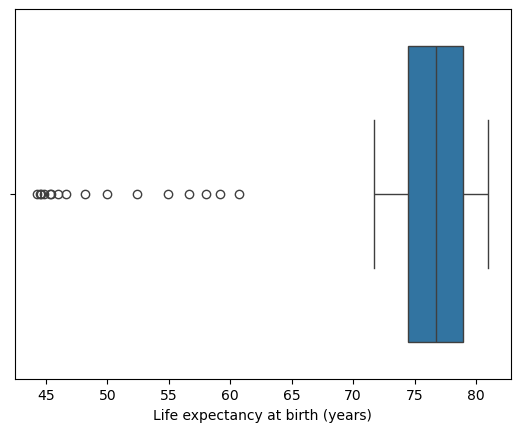

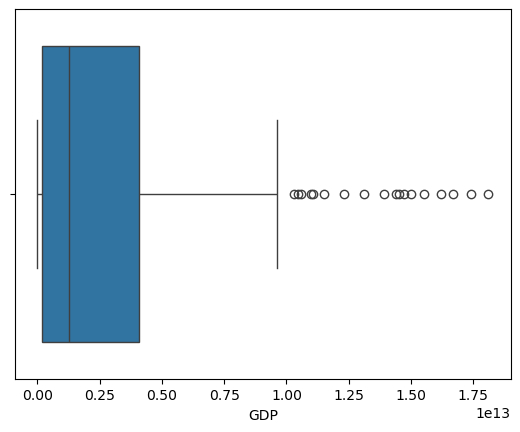

<Figure size 640x480 with 0 Axes>

In [17]:
sns.boxplot(data=df, x= 'Life expectancy at birth (years)')
plt.show()
plt.clf()

sns.boxplot(data=df, x='GDP')
plt.show()
plt.clf()

In [19]:
df.rename(columns={'Life expectancy at birth (years)': 'life_expectancy'}, inplace=True)

In [21]:
print(df['Country'].unique())
print(df['Year'].min(), df['Year'].max())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
2000 2015


In [23]:
print(df.groupby('Country')['life_expectancy'].mean())
print(df.groupby('Country')['GDP'].mean())

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: life_expectancy, dtype: float64
Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: GDP, dtype: float64


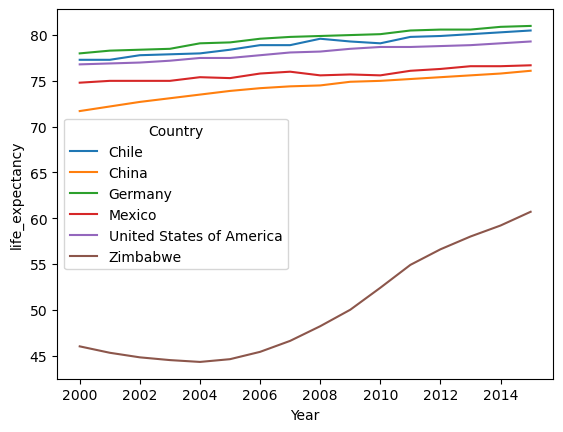

<Figure size 640x480 with 0 Axes>

In [25]:
sns.lineplot(data=df, x='Year', y='life_expectancy', hue='Country')
plt.show()
plt.clf()

#### Has life expectancy increased over time in the six nations?

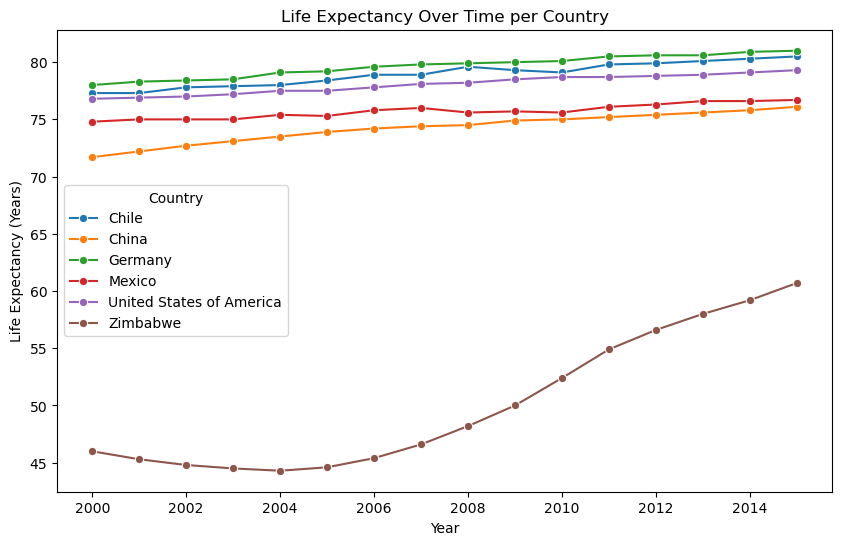

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='life_expectancy', hue='Country', marker='o')
plt.title('Life Expectancy Over Time per Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.legend(title = 'Country', loc = 'best')
plt.show()
plt.clf()


#### Has GDP increased over time in the six nations? 

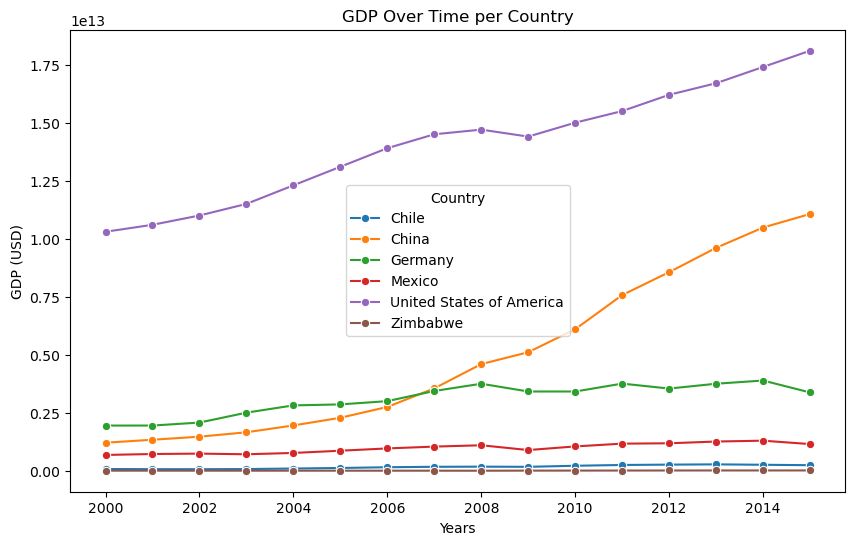

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='GDP', hue='Country', marker='o')
plt.title('GDP Over Time per Country')
plt.xlabel('Years')
plt.ylabel('GDP (USD)')
plt.legend(title='Country', loc='best')
# plt.yscale('log')
plt.show()
plt.clf()


#### Is there a correlation between GDP and life expectancy of a country?

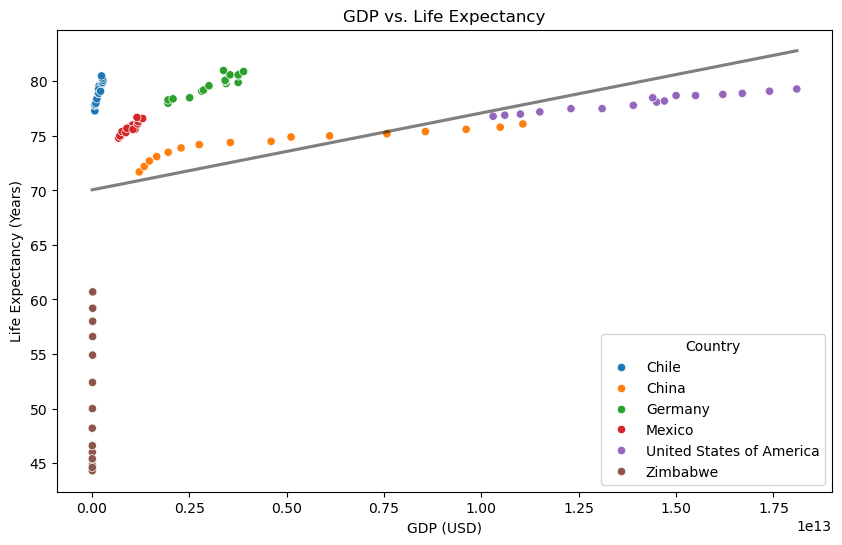

Correlation between GDP and Life Expectancy:  0.3432067484491549


<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GDP', y='life_expectancy', hue='Country')
sns.regplot(data=df, x='GDP', y='life_expectancy', scatter=False, ci=None, color='black', line_kws={'alpha':0.5})
plt.title('GDP vs. Life Expectancy')
plt.xlabel('GDP (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.show()
plt.clf()

corr = df[['GDP', 'life_expectancy']].corr().iloc[0,1]
print('Correlation between GDP and Life Expectancy: ', corr)

#### What is the average life expectancy on these nations? 

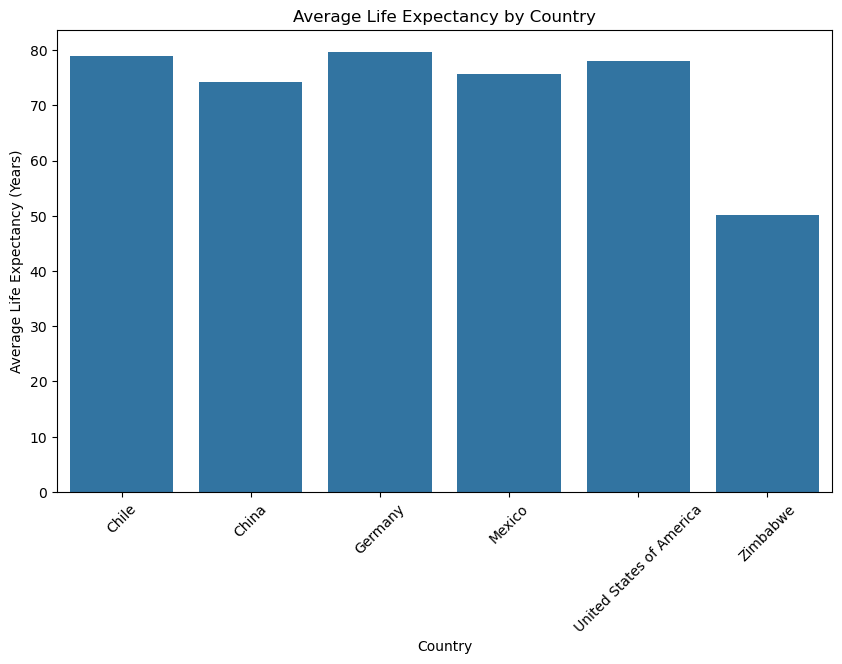

<Figure size 640x480 with 0 Axes>

In [37]:
avg_life_exp = df.groupby('Country')['life_expectancy'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_life_exp, x='Country', y='life_expectancy')
plt.title('Average Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy (Years)')
plt.xticks(rotation=45)
plt.show()
plt.clf()

#### What is the distribution of life expectancy?

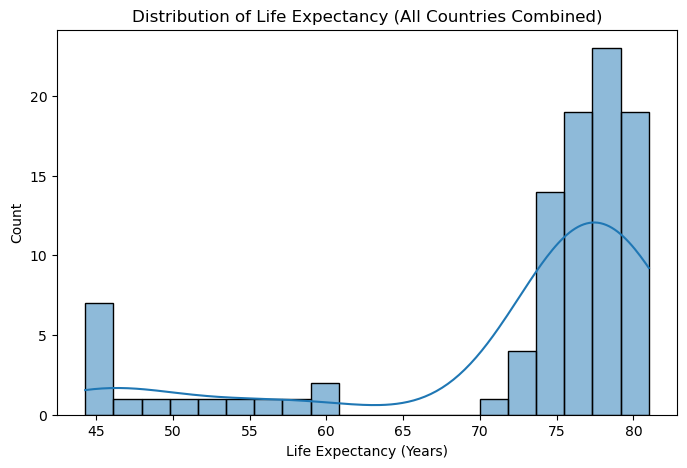

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='life_expectancy', kde=True, bins=20)
plt.title('Distribution of Life Expectancy (All Countries Combined)')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Count')
plt.show()
plt.clf()

#### Yearly Growth in GPD and Life Expectancy
- This year-to-year change view tells us if there increase of GDP in a particular year is correlated with an increase in life expectancy o the following year

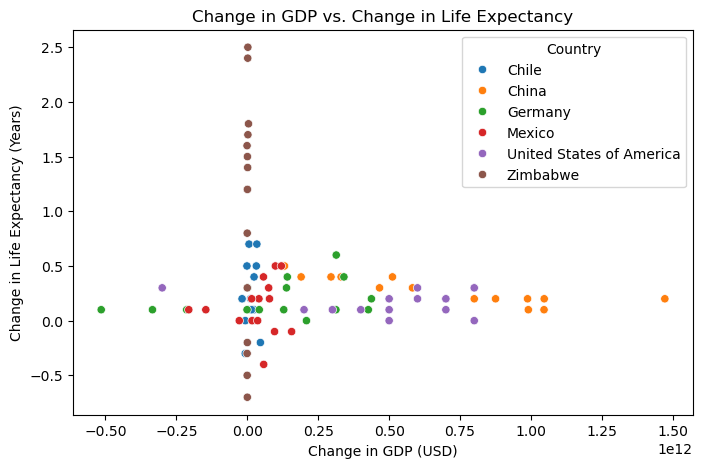

Correlation (year-to-year changes) between GDP and Life Expectancy: -0.1395862751657766


<Figure size 640x480 with 0 Axes>

In [82]:
# 1. Sort by Country/Year
df = df.sort_values(by=['Country', 'Year'])

# 2. Compute year-to-year changes
df['GDP_change'] = df.groupby('Country')['GDP'].diff()
df['LifeExp_change'] = df.groupby('Country')['life_expectancy'].diff()

# 3. Scatterplot of changes
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='GDP_change', y='LifeExp_change', hue='Country')
plt.title('Change in GDP vs. Change in Life Expectancy')
plt.xlabel('Change in GDP (USD)')
plt.ylabel('Change in Life Expectancy (Years)')
plt.show()
plt.clf()

# 4. Correlation of changes
change_corr = df[['GDP_change','LifeExp_change']].corr().iloc[0,1]
print("Correlation (year-to-year changes) between GDP and Life Expectancy:", change_corr)

Overall, year‐over‐year changes in GDP match short‐term changes in Life Expectancy. If you see a clear positive correlation, it implies that as GDP grows more quickly from one year to the next, Life Expectancy tends to rise as well (even if only incrementally).

#### Life Expectancy vs GDP (Slope comparison by country)

In [47]:
import statsmodels.formula.api as smf

for c in df['Country'].unique():
    sub_df = df[df['Country'] == c]
    model = smf.ols("life_expectancy ~ GDP", data=sub_df).fit()
    print(f"=== {c} ===")
    print(model.summary())
    print()

=== Chile ===
                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     129.2
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           1.87e-08
Time:                        12:29:01   Log-Likelihood:                -4.4985
No. Observations:                  16   AIC:                             13.00
Df Residuals:                      14   BIC:                             14.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.7223      0.213    35

C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\user\a

Each country has its own relationship between GDP and Life Expectancy. Typically, wealthy countries might have higher intercepts and possibly more modest slopes (as they’re already at high life expectancy), while countries that started with lower GDPs might show a stronger slope as they grow.

#### Comparison of Mean Life Expectancy Across Countries (Using ANOVA)

In [51]:
from scipy import stats
groups = [df.loc[df.Country == c, 'life_expectancy'] for c in df['Country'].unique()]

f_stat, p_value = stats.f_oneway(*groups)
print("One-way ANOVA for Life Expectancy across Countries")
print("F-statistic:", f_stat)
print("p-value:", p_value)

One-way ANOVA for Life Expectancy across Countries
F-statistic: 305.22921290515353
p-value: 7.885135700050126e-55


Not all countries share the same average life expectancy level. Some groups of countries have significantly higher or lower means, consistent with known global health disparities.

#### Time-Series Comparison

Country  Chile  China  Germany  Mexico  United States of America  Zimbabwe
Year                                                                      
2000      77.3   71.7     78.0    74.8                      76.8      46.0
2001      77.3   72.2     78.3    75.0                      76.9      45.3
2002      77.8   72.7     78.4    75.0                      77.0      44.8
2003      77.9   73.1     78.5    75.0                      77.2      44.5
2004      78.0   73.5     79.1    75.4                      77.5      44.3
2005      78.4   73.9     79.2    75.3                      77.5      44.6
2006      78.9   74.2     79.6    75.8                      77.8      45.4
2007      78.9   74.4     79.8    76.0                      78.1      46.6
2008      79.6   74.5     79.9    75.6                      78.2      48.2
2009      79.3   74.9     80.0    75.7                      78.5      50.0
2010      79.1   75.0     80.1    75.6                      78.7      52.4
2011      79.8   75.2    

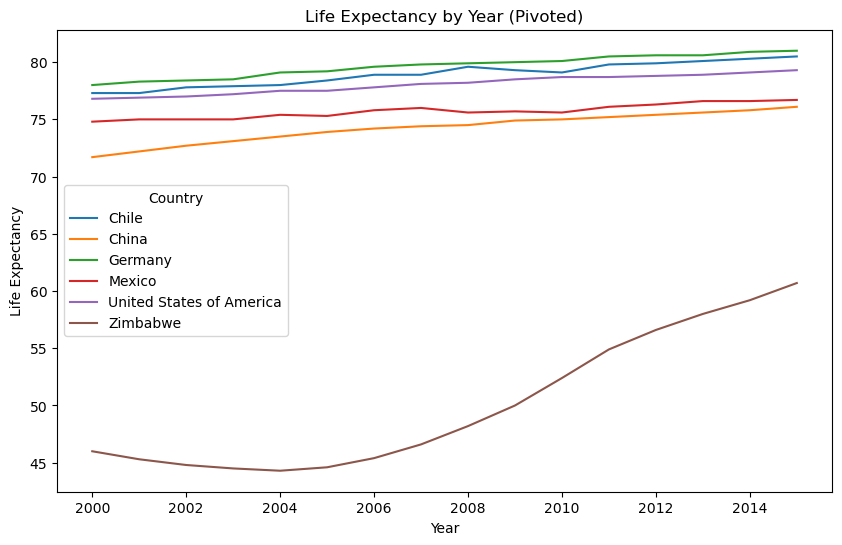

<Figure size 640x480 with 0 Axes>

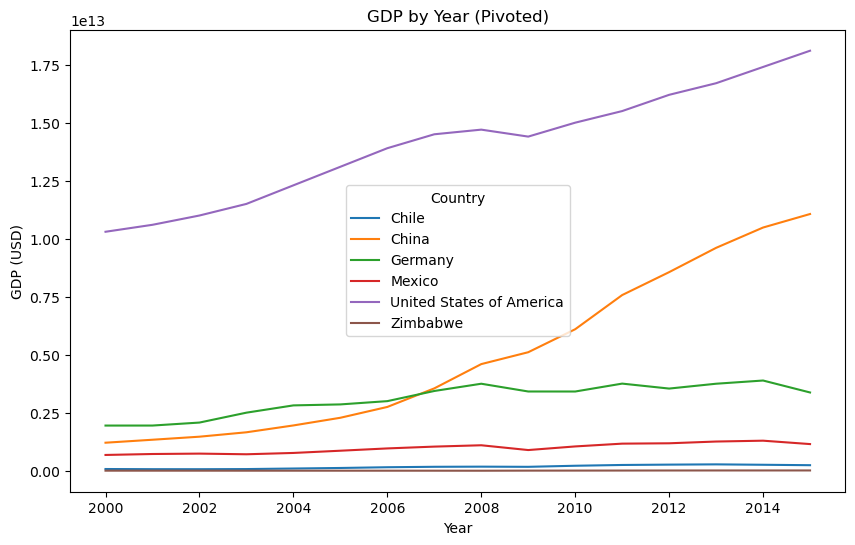

<Figure size 640x480 with 0 Axes>

In [55]:
# Pivot table of average Life Expectancy by Year and Country
life_exp_pivot = df.pivot(index='Year', columns='Country', values='life_expectancy')
print(life_exp_pivot)

gdp_pivot = df.pivot(index='Year', columns='Country', values='GDP')
print(gdp_pivot)

life_exp_pivot.plot(figsize=(10,6))
plt.title('Life Expectancy by Year (Pivoted)')
plt.ylabel('Life Expectancy')
plt.show()
plt.clf()

gdp_pivot.plot(figsize=(10,6))
plt.title('GDP by Year (Pivoted)')
plt.ylabel('GDP (USD)')
plt.show()
plt.clf()


#### Life Expectancy Modeling (Using GDP and Year)
- Year: Will be treated as a numeric variable, capturing the overall upward trend in life expectancy over time.
- C(Country): Is a catergorical variable providing each country with its own intercept.
- The GDP coefficient will tell us whether the GDP's effect remains significant after accounting for the time trend and avg differences among countries.

In [58]:
model_all = smf.ols("life_expectancy ~ GDP + Year + C(Country)", data=df).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     292.8
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           2.43e-56
Time:                        12:29:11   Log-Likelihood:                -217.48
No. Observations:                  96   AIC:                             449.0
Df Residuals:                      89   BIC:                             466.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

##### Results:
- After accounting for each country’s baseline difference (the country dummy variables) and the overall upward trend in life expectancy over the years (the Year variable), GDP still has a positive, statistically significant effect on life expectancy. In other words, even once we factor in ‘which country you are in’ and the simple passage of time, having a higher GDP is associated with a higher predicted life expectancy. Moreover, the large R^2 of the model indicates these three predictors jointly do an excellent job of explaining variations in life expectancy across countries from 2000 to 2015.

#### Conclusion:
- Throughout this project, I gained a deeper understanding of how to clean and explore data using Python libraries. In the initial steps, I learned the importance of examining summary statistics and visualizing distributions to detect outliers or trends and ensure the dataset was ready for analysis. By creating time series plots, pivot tables, and regression models, I also saw how GDP and life expectancy can be examined both over time and across different countries. Finally, trying out ANOVA and multiple regression taught me how to incorporate statistical tests and interpret them to make sense of complex relationships between variables such as time, GDP, and life expectancy
- Overall, the results were largely in line with expectations. Wealthier countries (in terms of GDP) tended to have higher life expectancies, and all countries showed some upward trend in life expectancy over the 2000–2015 period. This trend is consistent with general global improvements in healthcare, nutrition, and technology. One surprise was that the year‐to‐year changes in GDP did not strongly correlate with the year‐to‐year changes in life expectancy; this makes sense, though, when considering that life expectancy may respond to broader social factors rather than just short‐term economic changes.
###### Main Take Aways:
- Life Expectancy Differs Significantly by Country.
- Both Time and Wealth Matter.
- Annual GDP Changes Are Not Always Reflected in Immediate Life Expectancy Changes.

### Additional Graphs:

#### Violin Plot of Life Expectancy by Country

C:\Users\user\AppData\Local\Temp\ipykernel_41692\1262243662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Country', y='life_expectancy', inner='box', palette='Set2')


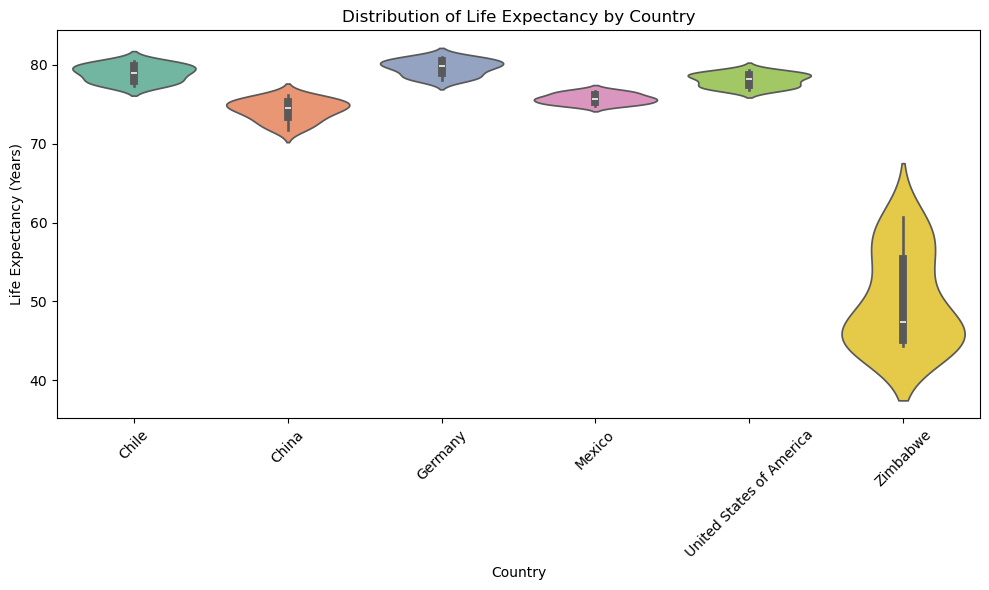

<Figure size 640x480 with 0 Axes>

In [64]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Country', y='life_expectancy', inner='box', palette='Set2')
plt.title('Distribution of Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (Years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()


#### Facetgrid of Scatter Graphs (GDP vs. Life Expectancy) by Country

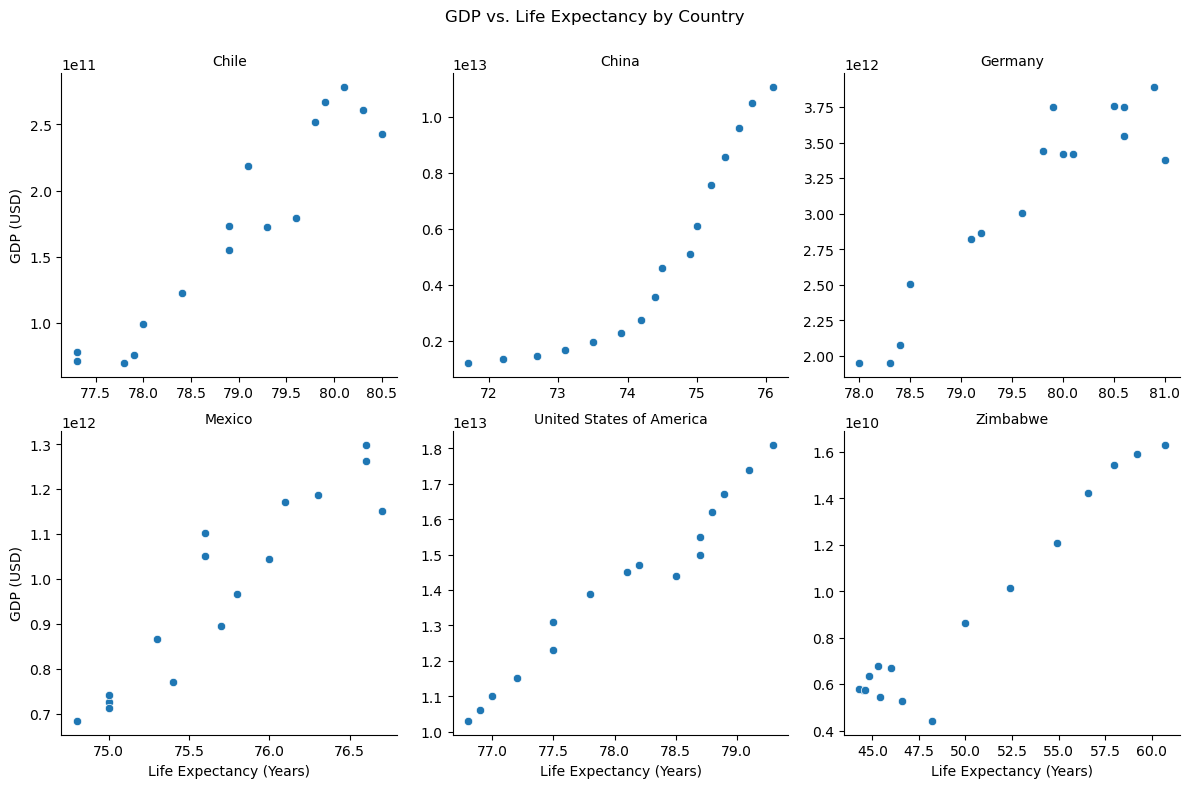

In [80]:
g = sns.FacetGrid(df, col='Country', col_wrap=3, height=4, 
                  sharex=False, sharey=False)  
g.map_dataframe(sns.scatterplot, x='life_expectancy', y='GDP', color='tab:blue')
g.set_axis_labels("Life Expectancy (Years)", "GDP (USD)")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("GDP vs. Life Expectancy by Country")
plt.show()


#### Facetgrid of Line Graph Mapping GDP Over Time By Country

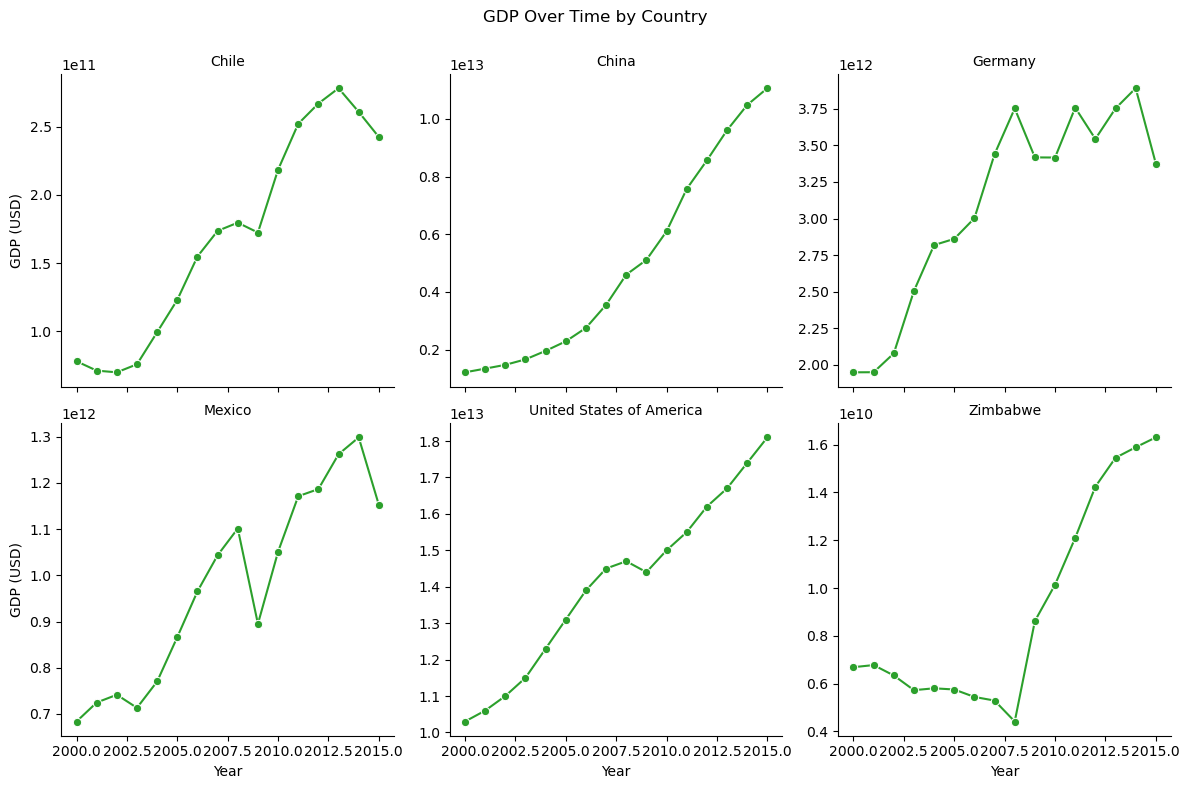

In [71]:
g = sns.FacetGrid(df, col='Country', col_wrap=3, height=4, 
                  sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x='Year', y='GDP', color='tab:green', marker='o')
g.set_axis_labels("Year", "GDP (USD)")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("GDP Over Time by Country")
plt.show()


#### Facetgrid of Line Graph Mapping Life Expectancy Over Time By Country

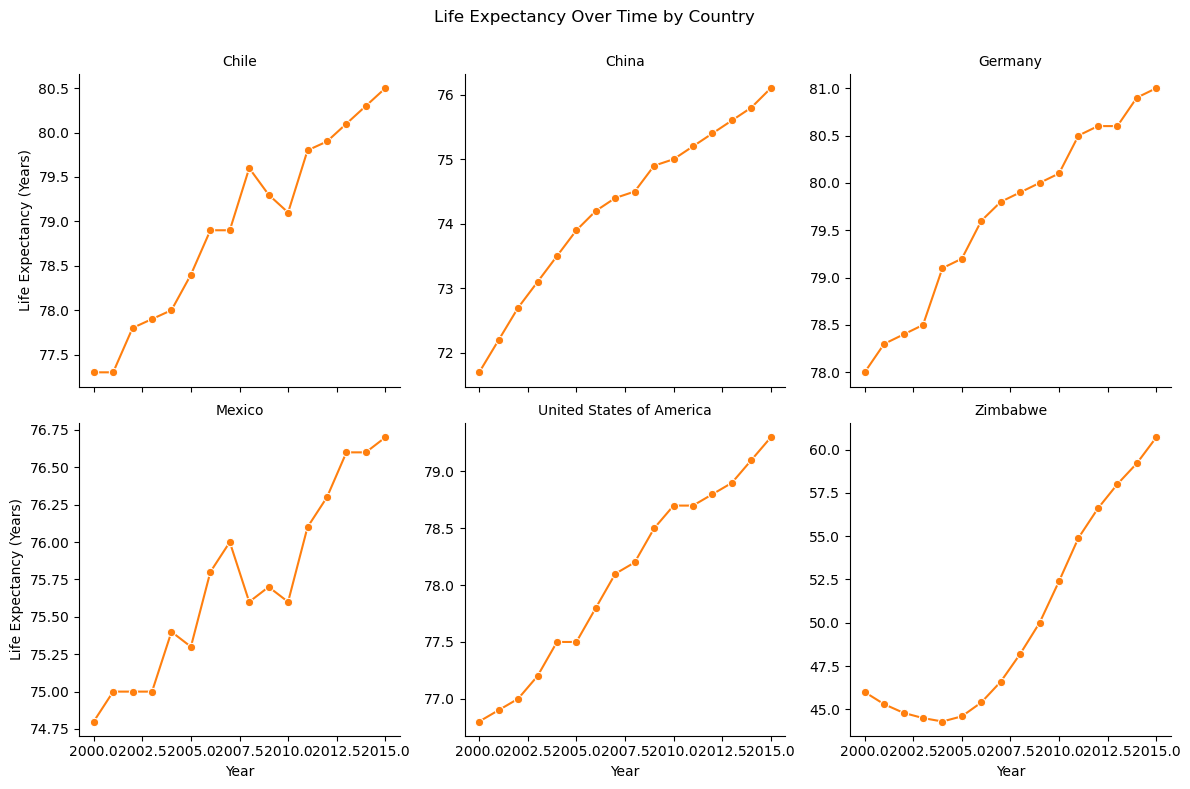

In [78]:
g = sns.FacetGrid(df, col='Country', col_wrap=3, height=4,
                  sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x='Year', y='life_expectancy', color='tab:orange', marker='o')
g.set_axis_labels("Year", "Life Expectancy (Years)")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Life Expectancy Over Time by Country")
plt.show()